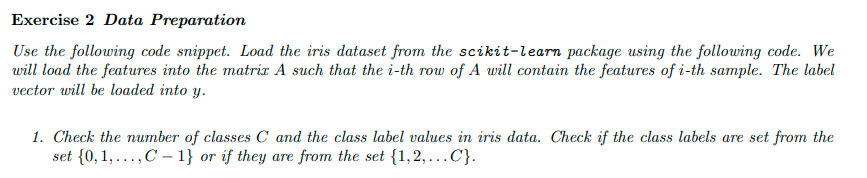

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Number of classes and class label values in iris data
C = len(np.unique(iris.target))
class_labels = np.unique(iris.target)

# Check if class labels are from {0, 1, ..., C-1} or {1, 2, ..., C}
if np.min(iris.target) == 0:
    print("Class labels are from the set {0, 1, ..., C-1}")
else:
    print("Class labels are from the set {1, 2, ..., C}")

print("Number of classes:", C)
print("Class label values:", class_labels)


Class labels are from the set {0, 1, ..., C-1}
Number of classes: 3
Class label values: [0 1 2]


2. When loading the labels into y do the following:
• If the class labels are from the set {0, 1, . . . , C − 1} convert classes 0, 2, 3, . . . , C − 1 to −1.
• If the class labels are from the set {1, 2, . . . , C} convert classes 2, 3 . . . C to −1
Thus, you will have class labels eventually belonging to the set {+1, −1}


In [ ]:
import numpy as np
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Check if class labels are from {0, 1, ..., C-1} or {1, 2, ..., C}
if np.min(iris.target) == 0:
    y = np.ones(iris.target.shape)  # Initialize y with all ones
    y[iris.target % 2 == 0] = -1  # Convert even classes to -1
else:
    y = np.ones(iris.target.shape) * -1  # Initialize y with all -1
    y[iris.target > 1] = 1  # Convert classes 2, 3, ..., C to 1

print("Modified labels:", y)



Modified labels: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]


3. Note that a shuffled index array indexarr is used in the code. Use this index array to partition the data and
labels into train and test splits. In particular, use the first 80% of the indices to create the training data and
labels. Use the remaining 20% to create the test data and labels. Store them in the variables train data,
train label, test data, test label.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Shuffled index array
indexarr = np.arange(len(iris.data))
np.random.shuffle(indexarr)

# Split ratio
split_ratio = 0.8
split_idx = int(len(indexarr) * split_ratio)

# Train data and labels
train_data = iris.data[indexarr[:split_idx]]
train_label = y[indexarr[:split_idx]]

# Test data and labels
test_data = iris.data[indexarr[split_idx:]]
test_label = y[indexarr[split_idx:]]

print("Train data shape:", train_data.shape)
print("Train label shape:", train_label.shape)
print("Test data shape:", test_data.shape)
print("Test label shape:", test_label.shape)


Train data shape: (120, 4)
Train label shape: (120,)
Test data shape: (30, 4)
Test label shape: (30,)


4. Write a python function that implements the prediction rule in eqn. (2). Use the following the code template.
def predict (w, x ) :

   return ???

In [ ]:
def predict(w, x):
    """
    Predict the class label using the perceptron prediction rule.

    Parameters:
    w (array-like): The weight vector.
    x (array-like): The input features.

    Returns:
    int: Predicted class label (+1 or -1).
    """
    # Compute the dot product of weights and input features
    wx = np.dot(w, x)

    # Apply the sign function to determine the predicted class label
    if wx >= 0:
        return 1
    else:
        return -1


5. Write a Python function that takes as input the model parameter w, data features, and labels and returns the
accuracy of the data. (Use the predict function).
def compute_accuracy ( data , labels , model_w ) :

Use predict function defined above

 return ???

In [ ]:
def compute_accuracy(data, labels, model_w):
    """
    Compute the accuracy of the data using the given model parameter w.

    Parameters:
    data (array-like): The input features.
    labels (array-like): The true class labels.
    model_w (array-like): The model parameter w.

    Returns:
    float: The accuracy of the data.
    """
    correct_predictions = 0
    total_samples = len(data)

    # Iterate over each data point
    for i in range(total_samples):
        # Predict the label using the model parameter w
        prediction = predict(model_w, data[i])

        # Check if the prediction matches the true label
        if prediction == labels[i]:
            correct_predictions += 1

    # Compute the accuracy as the ratio of correct predictions to total samples
    accuracy = correct_predictions / total_samples
    return accuracy
